In [1]:
import pandas as pd

df = pd.read_csv('/content/disparbud-od_15422_jumlah_wisatawan_berdasarkan_kategori_data.csv')
df

,id,kode_provinsi,nama_provinsi,kategori_wisatawan,jumlah_wisatawan,satuan,tahun
0,1,32,JAWA BARAT,WISATAWAN DOMESTIK,58728666,ORANG,2016
1,2,32,JAWA BARAT,WISATAWAN MANCANEGARA,4428094,ORANG,2016
2,3,32,JAWA BARAT,WISATAWAN DOMESTIK,59644070,ORANG,2017
3,4,32,JAWA BARAT,WISATAWAN MANCANEGARA,4984035,ORANG,2017
4,5,32,JAWA BARAT,WISATAWAN DOMESTIK,63298608,ORANG,2018
5,6,32,JAWA BARAT,WISATAWAN MANCANEGARA,2597455,ORANG,2018
6,7,32,JAWA BARAT,WISATAWAN DOMESTIK,64610832,ORANG,2019
7,8,32,JAWA BARAT,WISATAWAN MANCANEGARA,3645433,ORANG,2019
8,9,32,JAWA BARAT,WISATAWAN DOMESTIK,36524515,ORANG,2020
9,10,32,JAWA BARAT,WISATAWAN MANCANEGARA,3716950,ORANG,2020


In [2]:
df2 = pd.read_csv('/content/disparbud-od_15420_jml_pengunjung_tempat_rekreasi__jenis_wisatawan_data.csv')
df2

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_wisatawan,jumlah_pengunjung,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,MANCANEGARA,0,ORANG,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,NUSANTARA,0,ORANG,2014
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,MANCANEGARA,2849,ORANG,2014
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,NUSANTARA,111947,ORANG,2014
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,MANCANEGARA,36518,ORANG,2014
...,...,...,...,...,...,...,...,...,...
371,372,32,JAWA BARAT,3277,KOTA CIMAHI,NUSANTARA,65610,ORANG,2020
372,373,32,JAWA BARAT,3278,KOTA TASIKMALAYA,MANCANEGARA,50,ORANG,2020
373,374,32,JAWA BARAT,3278,KOTA TASIKMALAYA,NUSANTARA,48584,ORANG,2020
374,375,32,JAWA BARAT,3279,KOTA BANJAR,MANCANEGARA,9,ORANG,2020


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   376 non-null    int64 
 1   kode_provinsi        376 non-null    int64 
 2   nama_provinsi        376 non-null    object
 3   kode_kabupaten_kota  376 non-null    int64 
 4   nama_kabupaten_kota  376 non-null    object
 5   jenis_wisatawan      376 non-null    object
 6   jumlah_pengunjung    376 non-null    int64 
 7   satuan               376 non-null    object
 8   tahun                376 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 26.6+ KB


In [4]:
df2['kode_provinsi'].value_counts()

32    376
Name: kode_provinsi, dtype: int64

In [5]:
df2['nama_provinsi'].value_counts()

JAWA BARAT    376
Name: nama_provinsi, dtype: int64

In [6]:
df2_dropped_cols = df2.drop(['id', 'kode_provinsi', 'nama_provinsi'], axis=1)
df2_dropped_cols

,kode_kabupaten_kota,nama_kabupaten_kota,jenis_wisatawan,jumlah_pengunjung,satuan,tahun
0,3201,KABUPATEN BOGOR,MANCANEGARA,0,ORANG,2014
1,3201,KABUPATEN BOGOR,NUSANTARA,0,ORANG,2014
2,3202,KABUPATEN SUKABUMI,MANCANEGARA,2849,ORANG,2014
3,3202,KABUPATEN SUKABUMI,NUSANTARA,111947,ORANG,2014
4,3203,KABUPATEN CIANJUR,MANCANEGARA,36518,ORANG,2014
...,...,...,...,...,...,...
371,3277,KOTA CIMAHI,NUSANTARA,65610,ORANG,2020
372,3278,KOTA TASIKMALAYA,MANCANEGARA,50,ORANG,2020
373,3278,KOTA TASIKMALAYA,NUSANTARA,48584,ORANG,2020
374,3279,KOTA BANJAR,MANCANEGARA,9,ORANG,2020


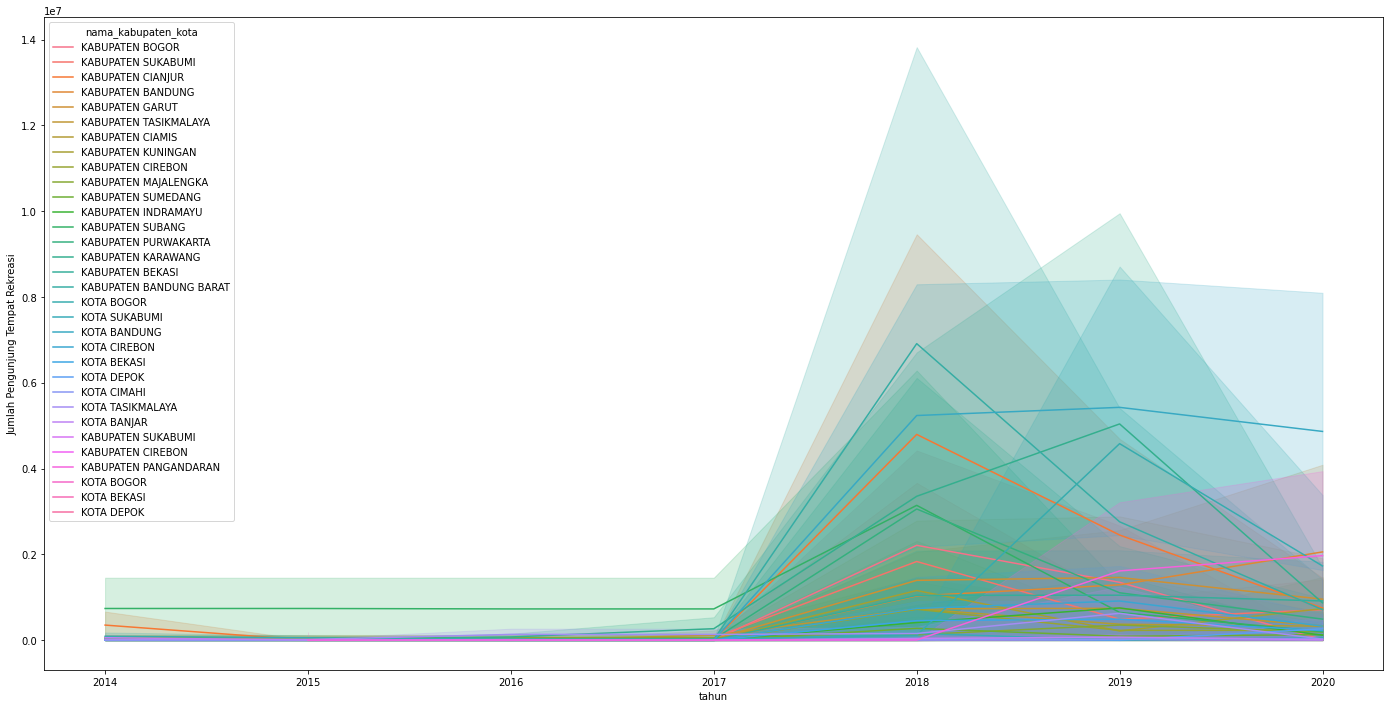

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 12))
sns.lineplot(data=df2_dropped_cols, x="tahun", y="jumlah_pengunjung", hue='nama_kabupaten_kota')
plt.ylabel('Jumlah Pengunjung Tempat Rekreasi')
plt.show()

In [15]:
df2_dropped_cols['satuan'].value_counts()

ORANG    376
Name: satuan, dtype: int64

In [16]:
df3_merged_df = df2_dropped_cols.groupby(['tahun', 'nama_kabupaten_kota'],as_index=False).agg({'jumlah_pengunjung':'sum'})
df3_merged_df

,tahun,nama_kabupaten_kota,jumlah_pengunjung
0,2014,KABUPATEN BANDUNG,0
1,2014,KABUPATEN BANDUNG BARAT,28232
2,2014,KABUPATEN BEKASI,0
3,2014,KABUPATEN BOGOR,0
4,2014,KABUPATEN CIAMIS,67602
...,...,...,...
183,2020,KOTA CIMAHI,65701
184,2020,KOTA CIREBON,653328
185,2020,KOTA DEPOK,526605
186,2020,KOTA SUKABUMI,107557


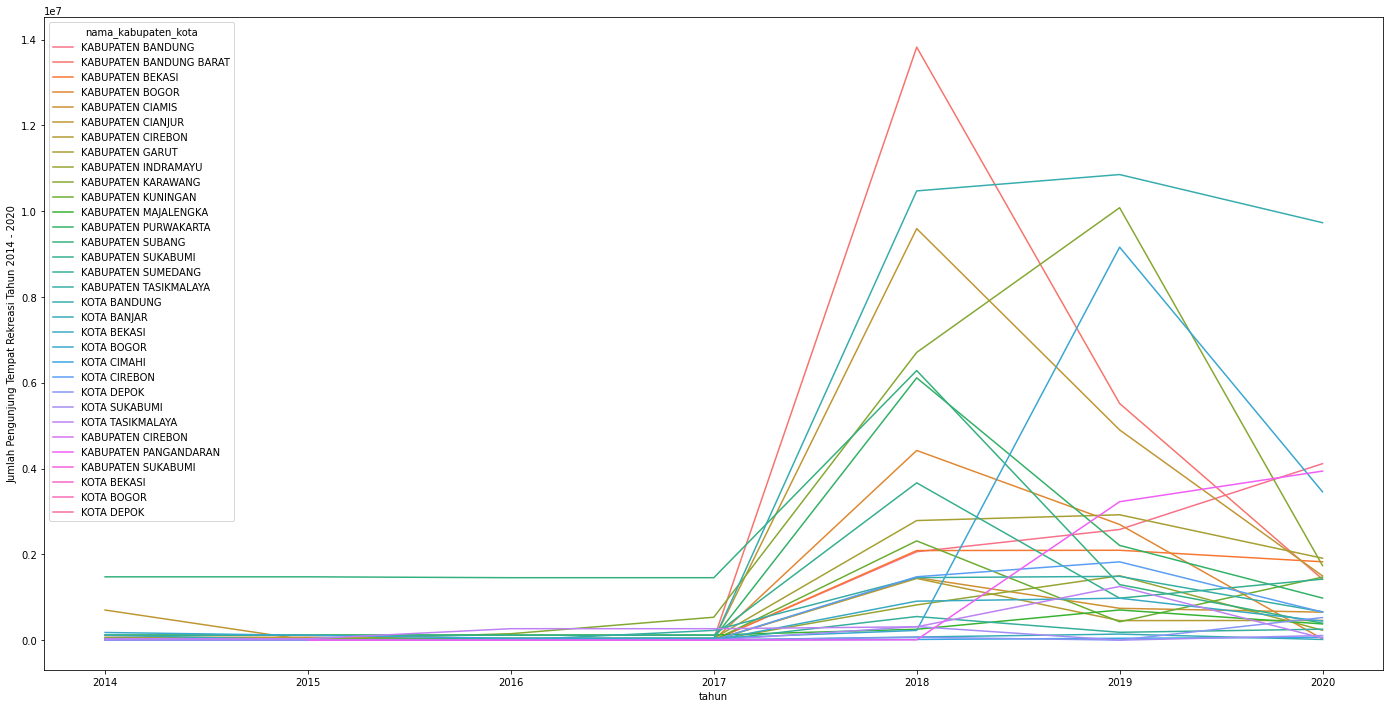

In [18]:
plt.figure(figsize=(24, 12))
sns.lineplot(data=df3_merged_df, x="tahun", y="jumlah_pengunjung", hue='nama_kabupaten_kota')
plt.ylabel('Jumlah Pengunjung Tempat Rekreasi Tahun 2014 - 2020')
plt.show()

In [25]:
df4_2018_2020 = df3_merged_df[df3_merged_df['tahun'] > 2017]
df4_2018_2020

,tahun,nama_kabupaten_kota,jumlah_pengunjung
107,2018,KABUPATEN BANDUNG,2061011
108,2018,KABUPATEN BANDUNG BARAT,13823714
109,2018,KABUPATEN BEKASI,2088299
110,2018,KABUPATEN BOGOR,4421363
111,2018,KABUPATEN CIAMIS,1458896
...,...,...,...
183,2020,KOTA CIMAHI,65701
184,2020,KOTA CIREBON,653328
185,2020,KOTA DEPOK,526605
186,2020,KOTA SUKABUMI,107557


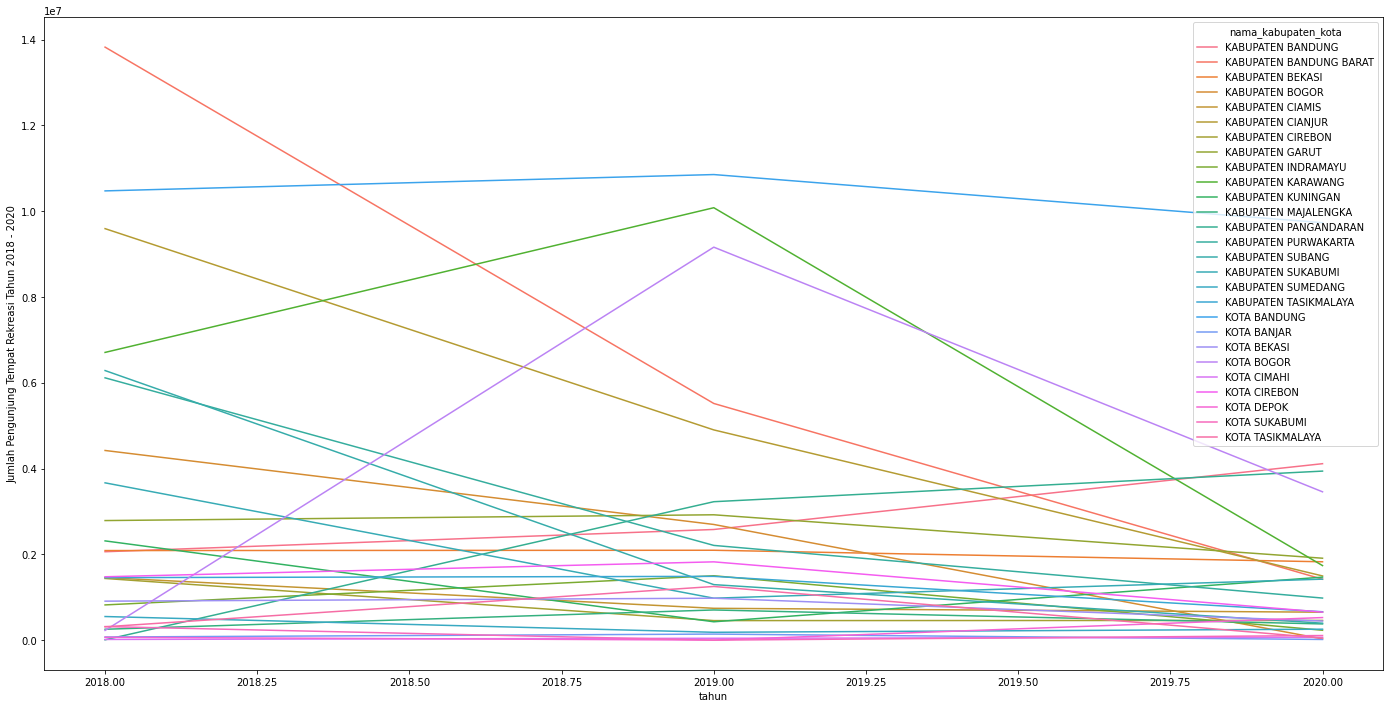

In [20]:
plt.figure(figsize=(24, 12))
sns.lineplot(data=df4_2018_2020, x="tahun", y="jumlah_pengunjung", hue='nama_kabupaten_kota')
plt.ylabel('Jumlah Pengunjung Tempat Rekreasi Tahun 2018 - 2020')
plt.show()

In [26]:
df4_2018_2020['tahun'] = pd.to_datetime(df4_2018_2020['tahun'], format='%Y')
df4_2018_2020['tahun'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2018-01-01    27
2019-01-01    27
2020-01-01    27
Name: tahun, dtype: int64

In [27]:
df4_2018_2020

,tahun,nama_kabupaten_kota,jumlah_pengunjung
107,2018-01-01,KABUPATEN BANDUNG,2061011
108,2018-01-01,KABUPATEN BANDUNG BARAT,13823714
109,2018-01-01,KABUPATEN BEKASI,2088299
110,2018-01-01,KABUPATEN BOGOR,4421363
111,2018-01-01,KABUPATEN CIAMIS,1458896
...,...,...,...
183,2020-01-01,KOTA CIMAHI,65701
184,2020-01-01,KOTA CIREBON,653328
185,2020-01-01,KOTA DEPOK,526605
186,2020-01-01,KOTA SUKABUMI,107557


In [30]:
df4_2018_2020[df4_2018_2020['jumlah_pengunjung'] < 100]

,tahun,nama_kabupaten_kota,jumlah_pengunjung
159,2019-01-01,KOTA SUKABUMI,0


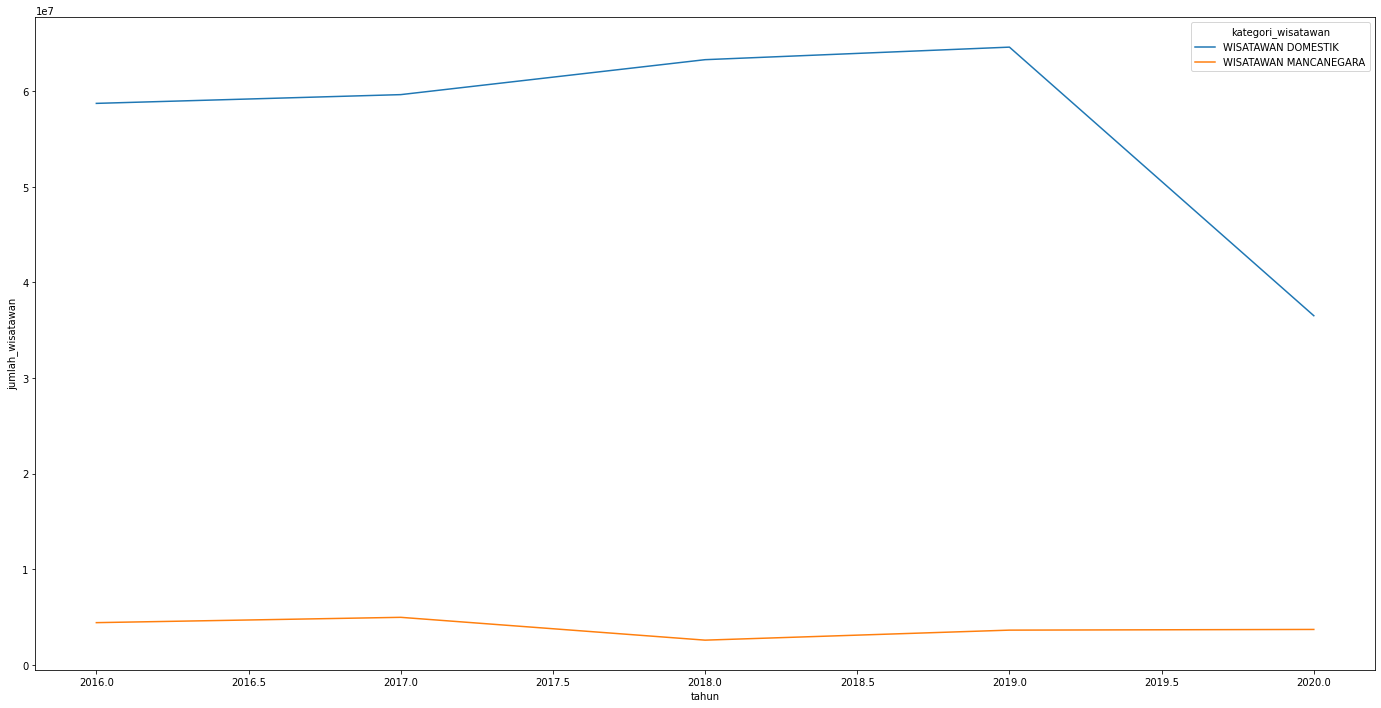

In [33]:
plt.figure(figsize=(24, 12))
sns.lineplot(data=df, x="tahun", y="jumlah_wisatawan", hue='kategori_wisatawan')
plt.show()